<a href="https://colab.research.google.com/github/gmarchiello/2023-Data-Science-Job-Market-Insights/blob/main/Data_Science_Job_Trends_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualizing Data Science Job Trends from SQL Data

In this project, I utilized SQL to extract and analyze data related to the data science job market. Following the data preparation in SQL, I employed Python solely for creating visualizations to enhance the presentation of insights in the README file.

# Import Packages

In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Average Salary & Job Count by Title

In [2]:
# Create a list of dictionaries to store average salary and job count by job title
# The data is copied from a SQL query result in JSON format for further analysis in Python

Avg_Salary_And_Job_Count_By_Title = [
  {
    "job_title_short": "Senior Data Scientist",
    "avg_salary": "154050.031829218565",
    "job_number": "1686"
  },
  {
    "job_title_short": "Senior Data Engineer",
    "avg_salary": "145866.871765213300",
    "job_number": "1594"
  },
  {
    "job_title_short": "Data Scientist",
    "avg_salary": "135929.476302786450",
    "job_number": "5926"
  },
  {
    "job_title_short": "Data Engineer",
    "avg_salary": "130266.870366905079",
    "job_number": "4509"
  },
  {
    "job_title_short": "Machine Learning Engineer",
    "avg_salary": "126785.905759162304",
    "job_number": "573"
  },
  {
    "job_title_short": "Senior Data Analyst",
    "avg_salary": "114104.053272692138",
    "job_number": "1132"
  },
  {
    "job_title_short": "Software Engineer",
    "avg_salary": "112777.641674440299",
    "job_number": "469"
  },
  {
    "job_title_short": "Cloud Engineer",
    "avg_salary": "111268.453846153846",
    "job_number": "65"
  },
  {
    "job_title_short": "Data Analyst",
    "avg_salary": "93875.788390364726",
    "job_number": "5463"
  },
  {
    "job_title_short": "Business Analyst",
    "avg_salary": "91071.043481564019",
    "job_number": "617"
  }
]

In [3]:
# Create a DataFrame from the Avg_Salary_And_Job_Count_By_Title data
df_sal = pd.DataFrame(Avg_Salary_And_Job_Count_By_Title)

# Convert the 'avg_salary' column to float type and round it to 2 decimal places
df_sal['avg_salary'] = round((df_sal['avg_salary'].astype(float)), 2)

# Convert the 'job_number' column to integer type
df_sal['job_number'] = df_sal['job_number'].astype(int)

# Print the resulting DataFrame to the console
print(df_sal)


             job_title_short  avg_salary  job_number
0      Senior Data Scientist   154050.03        1686
1       Senior Data Engineer   145866.87        1594
2             Data Scientist   135929.48        5926
3              Data Engineer   130266.87        4509
4  Machine Learning Engineer   126785.91         573
5        Senior Data Analyst   114104.05        1132
6          Software Engineer   112777.64         469
7             Cloud Engineer   111268.45          65
8               Data Analyst    93875.79        5463
9           Business Analyst    91071.04         617


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


NameError: name 'ax1' is not defined

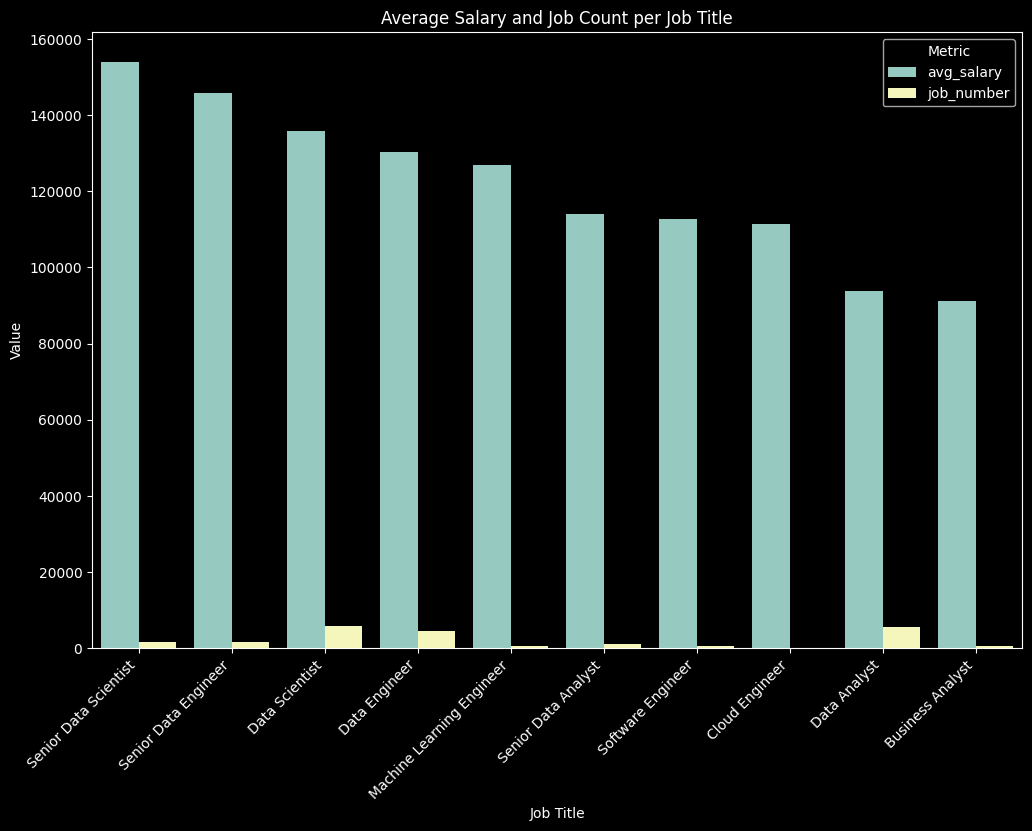

In [4]:
# Assuming df_sal is a DataFrame structured with:
# 'job_title_short' as the column for job titles
# 'avg_salary' as the column for the average salary of each job
# 'job_number' as the column representing the number of job openings for each job

# Melt the DataFrame:
# This process transforms the data from a wide format (where we have separate columns for 'avg_salary' and 'job_number')
# into a long format. This is needed to use the 'hue' parameter in seaborn for side-by-side bar comparisons.
df_melted = pd.melt(df_sal,
                    id_vars='job_title_short',  # Keeps 'job_title_short' intact, which will be used as the y-axis.
                    value_vars=['avg_salary', 'job_number'],  # These are the columns that we want to compare side-by-side.
                    var_name='Metric',  # This column will store whether the row refers to 'avg_salary' or 'job_number'.
                    value_name='Value')  # The actual numerical values (average salary or job count) will be stored in 'Value'.

# Apply the dark background style to make the plot visually appealing with a dark theme.
plt.style.use('dark_background')

# Set the figure size to make sure it's large enough for readability and visual impact.
plt.figure(figsize=(12, 8))

# Plot the melted DataFrame using seaborn's barplot:
# x = 'Value' -> This is the numerical value (either salary or job count).
# y = 'job_title_short' -> The job titles will be on the y-axis.
# hue = 'Metric' -> This will differentiate between 'avg_salary' and 'job_number', so they are color-coded.
# data = df_melted -> We are using the melted DataFrame for plotting.
sns.barplot(x='job_title_short', y='Value', hue='Metric', data=df_melted)

# Adding labels and title to the plot for clarity and context:
plt.xlabel('Job Title')  # x-axis label represents the numerical values (salary or job count).
plt.ylabel('Value')  # y-axis label represents the job titles.
plt.title('Average Salary and Job Count per Job Title')  # Descriptive title to explain what the plot represents.
plt.xticks(rotation=45, ha='right')



# Set the labels and title for the first y-axis
ax1.set_ylabel('Average Salary', color='cyan')
ax1.tick_params(axis='y', labelcolor='cyan')

# Create a second y-axis for job count
ax2 = ax1.twinx()  # This creates a second y-axis sharing the same x-axis
sns.barplot(x='job_title_short', y='Value', hue='Metric',
            data=df_melted[df_melted['Metric'] == 'job_number'],
            ax=ax2, color='orange', alpha=0.7, label='Job Count')



# Use tight_layout to ensure that labels, titles, and other plot elements don't overlap or get cut off.
plt.tight_layout()

# Display the plot.
plt.show()


## 2. Top 20 Job Locations by Postings

In [5]:
# Create a list of dictionaries to store average salary and job count by job title
# The data is copied from a SQL query result in JSON format for further analysis in Python

Top_Job_Locations = [
  {
    "global_rank": "1",
    "job_location": "Anywhere",
    "number_of_jobs": "69606"
  },
  {
    "global_rank": "2",
    "job_location": "Singapore",
    "number_of_jobs": "23423"
  },
  {
    "global_rank": "3",
    "job_location": "Paris, France",
    "number_of_jobs": "12354"
  },
  {
    "global_rank": "4",
    "job_location": "Bengaluru, Karnataka, India",
    "number_of_jobs": "11517"
  },
  {
    "global_rank": "5",
    "job_location": "London, UK",
    "number_of_jobs": "10578"
  },
  {
    "global_rank": "6",
    "job_location": "Madrid, Spain",
    "number_of_jobs": "9805"
  },
  {
    "global_rank": "7",
    "job_location": "New York, NY",
    "number_of_jobs": "8193"
  },
  {
    "global_rank": "8",
    "job_location": "India",
    "number_of_jobs": "7671"
  },
  {
    "global_rank": "9",
    "job_location": "United States",
    "number_of_jobs": "7449"
  },
  {
    "global_rank": "10",
    "job_location": "Hong Kong",
    "number_of_jobs": "7362"
  },
  {
    "global_rank": "11",
    "job_location": "Lisbon, Portugal",
    "number_of_jobs": "7215"
  },
  {
    "global_rank": "12",
    "job_location": "Atlanta, GA",
    "number_of_jobs": "7182"
  },
  {
    "global_rank": "13",
    "job_location": "Hyderabad, Telangana, India",
    "number_of_jobs": "6872"
  },
  {
    "global_rank": "14",
    "job_location": "Dublin, Ireland",
    "number_of_jobs": "6565"
  },
  {
    "global_rank": "15",
    "job_location": "Amsterdam, Netherlands",
    "number_of_jobs": "5987"
  },
  {
    "global_rank": "16",
    "job_location": "Chicago, IL",
    "number_of_jobs": "5561"
  },
  {
    "global_rank": "17",
    "job_location": "United Kingdom",
    "number_of_jobs": "5339"
  },
  {
    "global_rank": "18",
    "job_location": "Warsaw, Poland",
    "number_of_jobs": "5283"
  },
  {
    "global_rank": "19",
    "job_location": "Dallas, TX",
    "number_of_jobs": "5194"
  },
  {
    "global_rank": "20",
    "job_location": "Kuala Lumpur, Federal Territory of Kuala Lumpur, Malaysia",
    "number_of_jobs": "5084"
  }
]

In [6]:
# Create a DataFrame from the Top_Job_Locations data
df_Top_Job_Locations = pd.DataFrame(Top_Job_Locations)

# Display the first 20 rows of the DataFrame to get an overview of the top job locations
df_Top_Job_Locations.head(20)


,global_rank,job_location,number_of_jobs
0,1,Anywhere,69606
1,2,Singapore,23423
2,3,"Paris, France",12354
3,4,"Bengaluru, Karnataka, India",11517
4,5,"London, UK",10578
5,6,"Madrid, Spain",9805
6,7,"New York, NY",8193
7,8,India,7671
8,9,United States,7449
9,10,Hong Kong,7362


In [7]:
# Update specific job locations in the DataFrame to make them shorter and more coherent
df_Top_Job_Locations['job_location'].iloc[3] = 'Bengaluru, India'  # Change job location at index 3 to 'Bengaluru, India'
df_Top_Job_Locations['job_location'].iloc[12] = 'Hyderabad, India'  # Change job location at index 12 to 'Hyderabad, India'
df_Top_Job_Locations['job_location'].iloc[19] = 'Kuala Lumpur, Malaysia'  # Change job location at index 19 to 'Kuala Lumpur, Malaysia'

<ipython-input-7-901176596379>:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_Top_Job_Locations['job_location'].iloc[3] = 'Bengaluru, India'  # Change job location at index 3 to 'Bengaluru, India'
<ipython-input-7-901176596379>:3: Futur

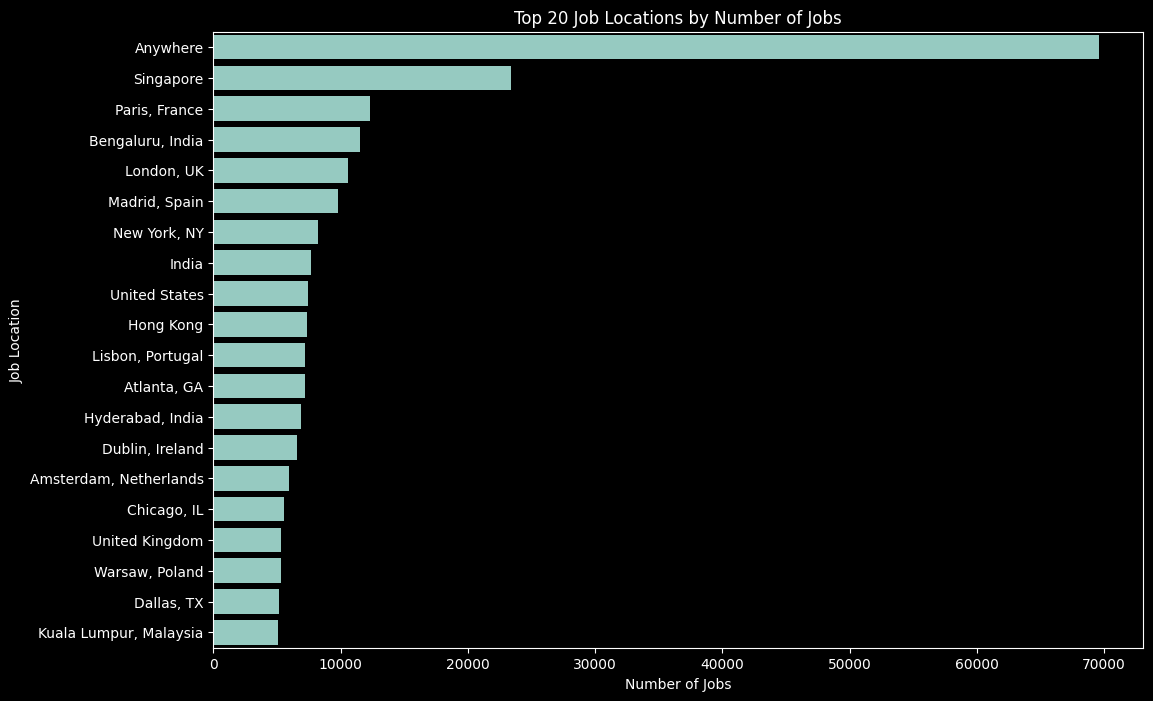

In [8]:
# Convert the 'number_of_jobs' column to integer type for accurate numerical operations and plotting
df_Top_Job_Locations['number_of_jobs'] = df_Top_Job_Locations['number_of_jobs'].astype(int)

# Sort the DataFrame by the 'number_of_jobs' column in descending order and keep the top 20 entries
df_sorted = df_Top_Job_Locations.sort_values('number_of_jobs', ascending=False).head(20)

# Set the plotting style to a dark background for better visibility and aesthetics
plt.style.use('dark_background')

# Create a new figure with a specified size of 12x8 inches
plt.figure(figsize=(12, 8))

# Generate a horizontal bar plot using seaborn to visualize the top job locations and their respective job counts
sns.barplot(x='number_of_jobs', y='job_location', data=df_sorted)

# Label the x-axis as 'Number of Jobs'
plt.xlabel('Number of Jobs')

# Label the y-axis as 'Job Location'
plt.ylabel('Job Location')

# Set the title of the plot
plt.title('Top 20 Job Locations by Number of Jobs')

# Display the plot to the user
plt.show()

##3. Top 20 Companies With More Remote Jobs

In [11]:
# Create a list of dictionaries to store average salary and job count by job title
# The data is copied from a SQL query result in JSON format for further analysis in Python

Top_20_Companies_With_More_Remote_Jobs_Remote_Jobs = [
  {
    "global_rank": "1",
    "company_name": "Listopro",
    "job_count": "1560"
  },
  {
    "global_rank": "2",
    "company_name": "Dice",
    "job_count": "1427"
  },
  {
    "global_rank": "3",
    "company_name": "Upwork",
    "job_count": "1376"
  },
  {
    "global_rank": "4",
    "company_name": "Get It Recruit - Information Technology",
    "job_count": "889"
  },
  {
    "global_rank": "5",
    "company_name": "EPAM Systems",
    "job_count": "428"
  },
  {
    "global_rank": "6",
    "company_name": "Harnham",
    "job_count": "401"
  },
  {
    "global_rank": "7",
    "company_name": "Insight Global",
    "job_count": "338"
  },
  {
    "global_rank": "8",
    "company_name": "EPAM Anywhere",
    "job_count": "308"
  },
  {
    "global_rank": "9",
    "company_name": "Crossover",
    "job_count": "278"
  },
  {
    "global_rank": "10",
    "company_name": "TELUS International AI Data Solutions",
    "job_count": "276"
  },
  {
    "global_rank": "11",
    "company_name": "Turing",
    "job_count": "238"
  },
  {
    "global_rank": "12",
    "company_name": "Robert Half",
    "job_count": "220"
  },
  {
    "global_rank": "13",
    "company_name": "Peroptyx",
    "job_count": "187"
  },
  {
    "global_rank": "14",
    "company_name": "Luxoft",
    "job_count": "185"
  },
  {
    "global_rank": "15",
    "company_name": "Jobot",
    "job_count": "159"
  },
  {
    "global_rank": "16",
    "company_name": "RemoteWorker UK",
    "job_count": "153"
  },
  {
    "global_rank": "17",
    "company_name": "TELUS International",
    "job_count": "150"
  },
  {
    "global_rank": "18",
    "company_name": "Braintrust",
    "job_count": "144"
  },
  {
    "global_rank": "19",
    "company_name": "Motion Recruitment",
    "job_count": "132"
  },
  {
    "global_rank": "20",
    "company_name": "Confidential",
    "job_count": "128"
  }
]

In [13]:
# Create a DataFrame from the list of top 20 companies with the highest number of remote jobs
df_Top_20_Companies_With_More_Remote_Jobs = pd.DataFrame(Top_20_Companies_With_More_Remote_Jobs_Remote_Jobs)

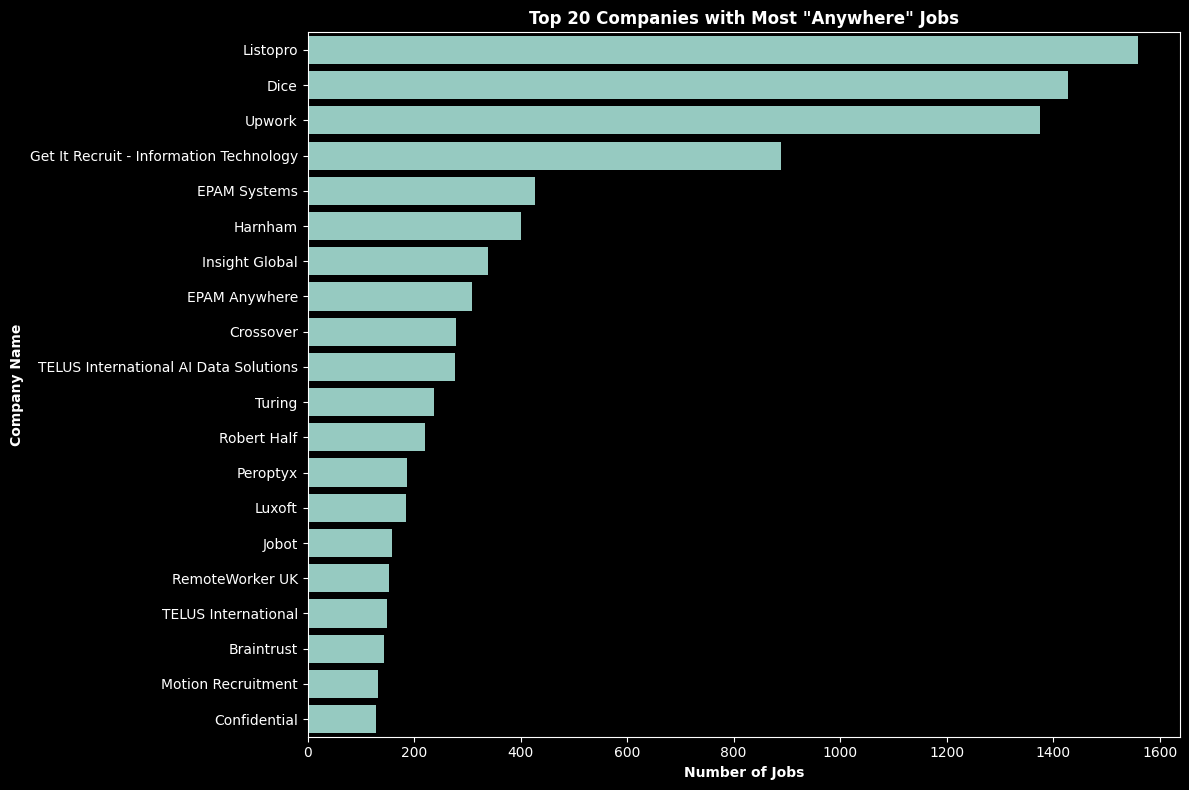

In [14]:
# Convert the 'job_count' column to integer type to ensure proper numerical operations and plotting
df_Top_20_Companies_With_More_Remote_Jobs['job_count'] = df_Top_20_Companies_With_More_Remote_Jobs['job_count'].astype(int)

# Sort the DataFrame by 'job_count' in descending order and select the top 20 companies with the highest job counts
df_sorted_company = df_Top_20_Companies_With_More_Remote_Jobs.sort_values('job_count', ascending=False).head(20)

# Set the plotting style to a dark background for improved visibility of the bars
plt.style.use('dark_background')  # Apply dark background style for better contrast

# Create a figure for the bar plot with specified dimensions (12 inches wide and 8 inches tall)
plt.figure(figsize=(12, 8))

# Generate a horizontal bar plot showing the number of jobs for the top 20 companies
sns.barplot(x='job_count', y='company_name', data=df_sorted_company)

# Label the x-axis as 'Number of Jobs' and set the font properties for better readability
plt.xlabel('Number of Jobs', fontweight='bold', color='white')  # Set x-axis label color to white

# Label the y-axis as 'Company Name' and set the font properties for better readability
plt.ylabel('Company Name', fontweight='bold', color='white')  # Set y-axis label color to white

# Set the title of the plot to provide context and enhance viewer understanding
plt.title('Top 20 Companies with Most "Anywhere" Jobs', fontweight='bold', color='white')  # Set title color to white

# Customize the color of x-tick labels to white for consistency with the dark background
plt.xticks(color='white')  # Set color of x-tick labels to white

# Customize the color of y-tick labels to white for consistency with the dark background
plt.yticks(color='white')  # Set color of y-tick labels to white

# Adjust the layout to prevent any clipping of the plot elements
plt.tight_layout()  # Optimize layout for better visual presentation

# Render and display the plot to the user
plt.show()  # Show the final plot

# 4.Top 20 Paying Data Scientist Remote Jobs

In [15]:
# Create a list of dictionaries to store average salary and job count by job title
# The data is copied from a SQL query result in JSON format for further analysis in Python

Top_20_Paying_Data_Scientist_Jobs_Anywhere = [
  {
    "global_rank": "1",
    "salary_rank": "1",
    "job_id": 40145,
    "job_title": "Staff Data Scientist/Quant Researcher",
    "job_title_short": "Data Scientist",
    "job_location": "Anywhere",
    "job_schedule_type": "Full-time",
    "salary_year_avg": "550000.0",
    "salary_category": "High",
    "company_name": "Selby Jennings",
    "total_jobs": "1288",
    "avg_salary": "149444.032948369565",
    "min_salary": "30750.0",
    "max_salary": "550000.0"
  },
  {
    "global_rank": "2",
    "salary_rank": "2",
    "job_id": 1714768,
    "job_title": "Staff Data Scientist - Business Analytics",
    "job_title_short": "Data Scientist",
    "job_location": "Anywhere",
    "job_schedule_type": "Full-time",
    "salary_year_avg": "525000.0",
    "salary_category": "High",
    "company_name": "Selby Jennings",
    "total_jobs": "1288",
    "avg_salary": "149444.032948369565",
    "min_salary": "30750.0",
    "max_salary": "550000.0"
  },
  {
    "global_rank": "3",
    "salary_rank": "1",
    "job_id": 327496,
    "job_title": "Senior Data Scientist",
    "job_title_short": "Senior Data Scientist",
    "job_location": "Anywhere",
    "job_schedule_type": "Full-time",
    "salary_year_avg": "475000.0",
    "salary_category": "High",
    "company_name": "Glocomms",
    "total_jobs": "1288",
    "avg_salary": "149444.032948369565",
    "min_salary": "30750.0",
    "max_salary": "550000.0"
  },
  {
    "global_rank": "4",
    "salary_rank": "3",
    "job_id": 1131472,
    "job_title": "Data Scientist",
    "job_title_short": "Data Scientist",
    "job_location": "Anywhere",
    "job_schedule_type": "Full-time",
    "salary_year_avg": "375000.0",
    "salary_category": "High",
    "company_name": "Algo Capital Group",
    "total_jobs": "1288",
    "avg_salary": "149444.032948369565",
    "min_salary": "30750.0",
    "max_salary": "550000.0"
  },
  {
    "global_rank": "5",
    "salary_rank": "2",
    "job_id": 627602,
    "job_title": "Senior Data Scientist",
    "job_title_short": "Senior Data Scientist",
    "job_location": "Anywhere",
    "job_schedule_type": "Full-time",
    "salary_year_avg": "375000.0",
    "salary_category": "High",
    "company_name": "Algo Capital Group",
    "total_jobs": "1288",
    "avg_salary": "149444.032948369565",
    "min_salary": "30750.0",
    "max_salary": "550000.0"
  },
  {
    "global_rank": "6",
    "salary_rank": "4",
    "job_id": 1742633,
    "job_title": "Head of Data Science",
    "job_title_short": "Data Scientist",
    "job_location": "Anywhere",
    "job_schedule_type": "Full-time",
    "salary_year_avg": "351500.0",
    "salary_category": "High",
    "company_name": "Demandbase",
    "total_jobs": "1288",
    "avg_salary": "149444.032948369565",
    "min_salary": "30750.0",
    "max_salary": "550000.0"
  },
  {
    "global_rank": "7",
    "salary_rank": "5",
    "job_id": 551497,
    "job_title": "Head of Data Science",
    "job_title_short": "Data Scientist",
    "job_location": "Anywhere",
    "job_schedule_type": "Full-time",
    "salary_year_avg": "324000.0",
    "salary_category": "High",
    "company_name": "Demandbase",
    "total_jobs": "1288",
    "avg_salary": "149444.032948369565",
    "min_salary": "30750.0",
    "max_salary": "550000.0"
  },
  {
    "global_rank": "8",
    "salary_rank": "6",
    "job_id": 126218,
    "job_title": "Director Level - Product Management - Data Science",
    "job_title_short": "Data Scientist",
    "job_location": "Anywhere",
    "job_schedule_type": "Full-time",
    "salary_year_avg": "320000.0",
    "salary_category": "High",
    "company_name": "Teramind",
    "total_jobs": "1288",
    "avg_salary": "149444.032948369565",
    "min_salary": "30750.0",
    "max_salary": "550000.0"
  },
  {
    "global_rank": "9",
    "salary_rank": "3",
    "job_id": 488169,
    "job_title": "Senior Director Data Science & ML",
    "job_title_short": "Senior Data Scientist",
    "job_location": "Anywhere",
    "job_schedule_type": "Full-time",
    "salary_year_avg": "315000.0",
    "salary_category": "High",
    "company_name": "Life Science People",
    "total_jobs": "1288",
    "avg_salary": "149444.032948369565",
    "min_salary": "30750.0",
    "max_salary": "550000.0"
  },
  {
    "global_rank": "10",
    "salary_rank": "7",
    "job_id": 1161630,
    "job_title": "Director of Data Science & Analytics",
    "job_title_short": "Data Scientist",
    "job_location": "Anywhere",
    "job_schedule_type": "Full-time",
    "salary_year_avg": "313000.0",
    "salary_category": "High",
    "company_name": "Reddit",
    "total_jobs": "1288",
    "avg_salary": "149444.032948369565",
    "min_salary": "30750.0",
    "max_salary": "550000.0"
  },
  {
    "global_rank": "11",
    "salary_rank": "4",
    "job_id": 1080763,
    "job_title": "Sr. Director - Data Science",
    "job_title_short": "Senior Data Scientist",
    "job_location": "Anywhere",
    "job_schedule_type": "Full-time",
    "salary_year_avg": "310000.0",
    "salary_category": "High",
    "company_name": "Indeed",
    "total_jobs": "1288",
    "avg_salary": "149444.032948369565",
    "min_salary": "30750.0",
    "max_salary": "550000.0"
  },
  {
    "global_rank": "12",
    "salary_rank": "8",
    "job_id": 38905,
    "job_title": "Principal Data Scientist",
    "job_title_short": "Data Scientist",
    "job_location": "Anywhere",
    "job_schedule_type": "Full-time",
    "salary_year_avg": "300000.0",
    "salary_category": "High",
    "company_name": "Storm5",
    "total_jobs": "1288",
    "avg_salary": "149444.032948369565",
    "min_salary": "30750.0",
    "max_salary": "550000.0"
  },
  {
    "global_rank": "13",
    "salary_rank": "8",
    "job_id": 226011,
    "job_title": "Distinguished Data Scientist",
    "job_title_short": "Data Scientist",
    "job_location": "Anywhere",
    "job_schedule_type": "Full-time",
    "salary_year_avg": "300000.0",
    "salary_category": "High",
    "company_name": "Walmart",
    "total_jobs": "1288",
    "avg_salary": "149444.032948369565",
    "min_salary": "30750.0",
    "max_salary": "550000.0"
  },
  {
    "global_rank": "14",
    "salary_rank": "8",
    "job_id": 457991,
    "job_title": "Head of Battery Data Science",
    "job_title_short": "Data Scientist",
    "job_location": "Anywhere",
    "job_schedule_type": "Full-time",
    "salary_year_avg": "300000.0",
    "salary_category": "High",
    "company_name": "Lawrence Harvey",
    "total_jobs": "1288",
    "avg_salary": "149444.032948369565",
    "min_salary": "30750.0",
    "max_salary": "550000.0"
  },
  {
    "global_rank": "15",
    "salary_rank": "8",
    "job_id": 129924,
    "job_title": "Director of Data Science",
    "job_title_short": "Data Scientist",
    "job_location": "Anywhere",
    "job_schedule_type": "Full-time",
    "salary_year_avg": "300000.0",
    "salary_category": "High",
    "company_name": "Storm4",
    "total_jobs": "1288",
    "avg_salary": "149444.032948369565",
    "min_salary": "30750.0",
    "max_salary": "550000.0"
  },
  {
    "global_rank": "16",
    "salary_rank": "5",
    "job_id": 91852,
    "job_title": "Senior Data Scientist",
    "job_title_short": "Senior Data Scientist",
    "job_location": "Anywhere",
    "job_schedule_type": None,
    "salary_year_avg": "300000.0",
    "salary_category": "High",
    "company_name": "Top Artificial Intelligence Company",
    "total_jobs": "1288",
    "avg_salary": "149444.032948369565",
    "min_salary": "30750.0",
    "max_salary": "550000.0"
  },
  {
    "global_rank": "17",
    "salary_rank": "6",
    "job_id": 792086,
    "job_title": "Senior Director, Data Science and Threat Research - Remote",
    "job_title_short": "Senior Data Scientist",
    "job_location": "Anywhere",
    "job_schedule_type": "Full-time",
    "salary_year_avg": "265119.0",
    "salary_category": "High",
    "company_name": "Akamai",
    "total_jobs": "1288",
    "avg_salary": "149444.032948369565",
    "min_salary": "30750.0",
    "max_salary": "550000.0"
  },
  {
    "global_rank": "18",
    "salary_rank": "7",
    "job_id": 1118358,
    "job_title": "Sr. Staff Tech Lead, Core ML Data Science",
    "job_title_short": "Senior Data Scientist",
    "job_location": "Anywhere",
    "job_schedule_type": "Full-time",
    "salary_year_avg": "245000.0",
    "salary_category": "High",
    "company_name": "Airbnb",
    "total_jobs": "1288",
    "avg_salary": "149444.032948369565",
    "min_salary": "30750.0",
    "max_salary": "550000.0"
  },
  {
    "global_rank": "19",
    "salary_rank": "7",
    "job_id": 223269,
    "job_title": "Senior Staff Data Scientist - Inference, Marketing Technology",
    "job_title_short": "Senior Data Scientist",
    "job_location": "Anywhere",
    "job_schedule_type": "Full-time",
    "salary_year_avg": "245000.0",
    "salary_category": "High",
    "company_name": "Airbnb",
    "total_jobs": "1288",
    "avg_salary": "149444.032948369565",
    "min_salary": "30750.0",
    "max_salary": "550000.0"
  },
  {
    "global_rank": "20",
    "salary_rank": "9",
    "job_id": 666561,
    "job_title": "Senior Data Scientist (Remote)",
    "job_title_short": "Senior Data Scientist",
    "job_location": "Anywhere",
    "job_schedule_type": "Full-time",
    "salary_year_avg": "235000.0",
    "salary_category": "High",
    "company_name": "Movable Ink",
    "total_jobs": "1288",
    "avg_salary": "149444.032948369565",
    "min_salary": "30750.0",
    "max_salary": "550000.0"
  }
]

In [16]:
# Create a DataFrame from the 'Top_20_Paying_Data_Scientist_Jobs_Anywhere' data structure
df_Top_20_Paying_Data_Scientist_Jobs_Anywhere = pd.DataFrame(Top_20_Paying_Data_Scientist_Jobs_Anywhere)

# Display the DataFrame containing the top 20 highest-paying data scientist jobs available anywhere
df_Top_20_Paying_Data_Scientist_Jobs_Anywhere  # This will show the DataFrame in the output

,global_rank,salary_rank,job_id,job_title,job_title_short,job_location,job_schedule_type,salary_year_avg,salary_category,company_name,total_jobs,avg_salary,min_salary,max_salary
0,1,1,40145,Staff Data Scientist/Quant Researcher,Data Scientist,Anywhere,Full-time,550000.0,High,Selby Jennings,1288,149444.032948369565,30750.0,550000.0
1,2,2,1714768,Staff Data Scientist - Business Analytics,Data Scientist,Anywhere,Full-time,525000.0,High,Selby Jennings,1288,149444.032948369565,30750.0,550000.0
2,3,1,327496,Senior Data Scientist,Senior Data Scientist,Anywhere,Full-time,475000.0,High,Glocomms,1288,149444.032948369565,30750.0,550000.0
3,4,3,1131472,Data Scientist,Data Scientist,Anywhere,Full-time,375000.0,High,Algo Capital Group,1288,149444.032948369565,30750.0,550000.0
4,5,2,627602,Senior Data Scientist,Senior Data Scientist,Anywhere,Full-time,375000.0,High,Algo Capital Group,1288,149444.032948369565,30750.0,550000.0
5,6,4,1742633,Head of Data Science,Data Scientist,Anywhere,Full-time,351500.0,High,Demandbase,1288,149444.032948369565,30750.0,550000.0
6,7,5,551497,Head of Data Science,Data Scientist,Anywhere,Full-time,324000.0,High,Demandbase,1288,149444.032948369565,30750.0,550000.0
7,8,6,126218,Director Level - Product Management - Data Sci...,Data Scientist,Anywhere,Full-time,320000.0,High,Teramind,1288,149444.032948369565,30750.0,550000.0
8,9,3,488169,Senior Director Data Science & ML,Senior Data Scientist,Anywhere,Full-time,315000.0,High,Life Science People,1288,149444.032948369565,30750.0,550000.0
9,10,7,1161630,Director of Data Science & Analytics,Data Scientist,Anywhere,Full-time,313000.0,High,Reddit,1288,149444.032948369565,30750.0,550000.0


## 5. 5. Top 20 Data Scientist vs. Senior Data Scientist Skills

In [17]:
# Create a list of dictionaries to store average salary and job count by job title
# The data is copied from a SQL query result in JSON format for further analysis in Python

Top_20_Data_Scientist_vs_Senior_Data_Scientist_Skills = [
  {
    "global_rank": "1",
    "skills": "python",
    "Data Scientist Demand Count": "114016",
    "Senior Data Scientist Demand Count": "25996"
  },
  {
    "global_rank": "2",
    "skills": "sql",
    "Data Scientist Demand Count": "79174",
    "Senior Data Scientist Demand Count": "18661"
  },
  {
    "global_rank": "3",
    "skills": "r",
    "Data Scientist Demand Count": "59754",
    "Senior Data Scientist Demand Count": "12772"
  },
  {
    "global_rank": "4",
    "skills": "sas",
    "Data Scientist Demand Count": "29642",
    "Senior Data Scientist Demand Count": "6292"
  },
  {
    "global_rank": "5",
    "skills": "tableau",
    "Data Scientist Demand Count": "29513",
    "Senior Data Scientist Demand Count": "5959"
  },
  {
    "global_rank": "6",
    "skills": "aws",
    "Data Scientist Demand Count": "26311",
    "Senior Data Scientist Demand Count": "7468"
  },
  {
    "global_rank": "7",
    "skills": "spark",
    "Data Scientist Demand Count": "24353",
    "Senior Data Scientist Demand Count": "6638"
  },
  {
    "global_rank": "8",
    "skills": "azure",
    "Data Scientist Demand Count": "21698",
    "Senior Data Scientist Demand Count": "5529"
  },
  {
    "global_rank": "9",
    "skills": "tensorflow",
    "Data Scientist Demand Count": "19193",
    "Senior Data Scientist Demand Count": "5068"
  },
  {
    "global_rank": "10",
    "skills": "excel",
    "Data Scientist Demand Count": "17601",
    "Senior Data Scientist Demand Count": "3285"
  },
  {
    "global_rank": "11",
    "skills": "java",
    "Data Scientist Demand Count": "16314",
    "Senior Data Scientist Demand Count": "3135"
  },
  {
    "global_rank": "12",
    "skills": "power bi",
    "Data Scientist Demand Count": "15744",
    "Senior Data Scientist Demand Count": "2788"
  },
  {
    "global_rank": "13",
    "skills": "hadoop",
    "Data Scientist Demand Count": "15575",
    "Senior Data Scientist Demand Count": "3534"
  },
  {
    "global_rank": "14",
    "skills": "pytorch",
    "Data Scientist Demand Count": "15075",
    "Senior Data Scientist Demand Count": "4386"
  },
  {
    "global_rank": "15",
    "skills": "pandas",
    "Data Scientist Demand Count": "14866",
    "Senior Data Scientist Demand Count": "3614"
  },
  {
    "global_rank": "16",
    "skills": "git",
    "Data Scientist Demand Count": "12285",
    "Senior Data Scientist Demand Count": "2963"
  },
  {
    "global_rank": "17",
    "skills": "scikit-learn",
    "Data Scientist Demand Count": "11636",
    "Senior Data Scientist Demand Count": "3244"
  },
  {
    "global_rank": "18",
    "skills": "numpy",
    "Data Scientist Demand Count": "10818",
    "Senior Data Scientist Demand Count": "2510"
  },
  {
    "global_rank": "19",
    "skills": "scala",
    "Data Scientist Demand Count": "10416",
    "Senior Data Scientist Demand Count": "2856"
  },
  {
    "global_rank": "20",
    "skills": "gcp",
    "Data Scientist Demand Count": "8736",
    "Senior Data Scientist Demand Count": "2618"
  }
]

In [18]:
# Create a DataFrame from the 'Top_20_Data_Scientist_vs_Senior_Data_Scientist_Skills' data structure
df_Top_20_Data_Scientist_vs_Senior_Data_Scientist_Skills = pd.DataFrame(Top_20_Data_Scientist_vs_Senior_Data_Scientist_Skills)

# Display the first 20 rows of the DataFrame to show a comparison of skills required for Data Scientists versus Senior Data Scientists
df_Top_20_Data_Scientist_vs_Senior_Data_Scientist_Skills.head(20)  # This will output the top 20 entries in the DataFrame

,global_rank,skills,Data Scientist Demand Count,Senior Data Scientist Demand Count
0,1,python,114016,25996
1,2,sql,79174,18661
2,3,r,59754,12772
3,4,sas,29642,6292
4,5,tableau,29513,5959
5,6,aws,26311,7468
6,7,spark,24353,6638
7,8,azure,21698,5529
8,9,tensorflow,19193,5068
9,10,excel,17601,3285


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


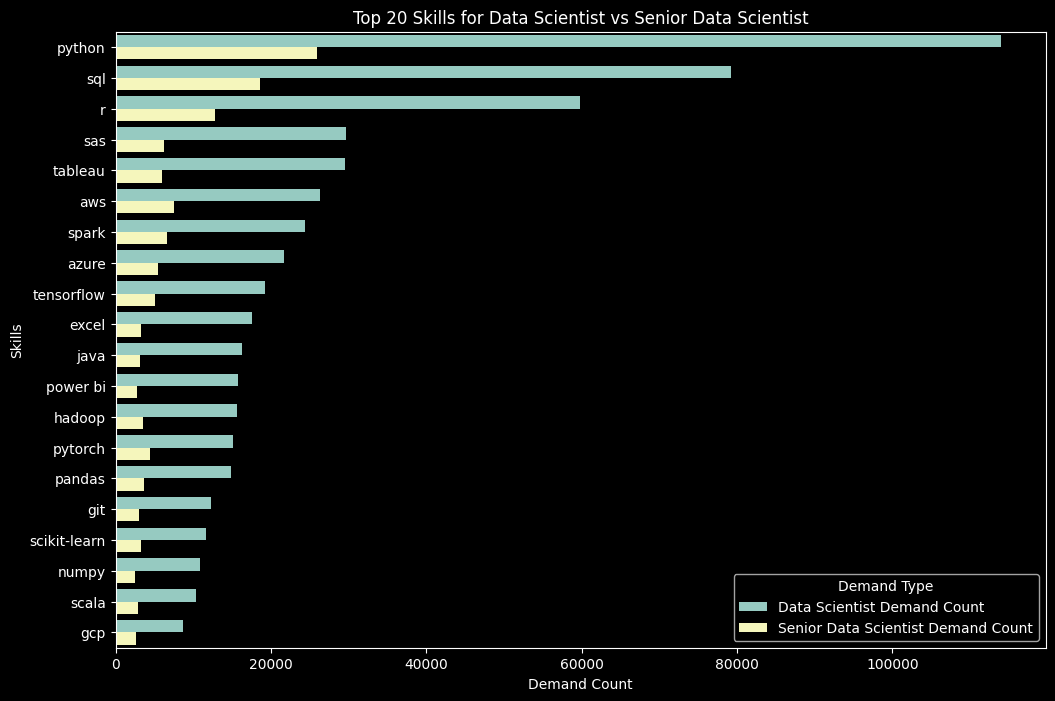

In [22]:
# Convert the 'Data Scientist Demand Count' column to integer type for accurate numerical representation
df_Top_20_Data_Scientist_vs_Senior_Data_Scientist_Skills['Data Scientist Demand Count'] = df_Top_20_Data_Scientist_vs_Senior_Data_Scientist_Skills['Data Scientist Demand Count'].astype(int)

# Convert the 'Senior Data Scientist Demand Count' column to integer type for accurate numerical representation
df_Top_20_Data_Scientist_vs_Senior_Data_Scientist_Skills['Senior Data Scientist Demand Count'] = df_Top_20_Data_Scientist_vs_Senior_Data_Scientist_Skills['Senior Data Scientist Demand Count'].astype(int)

# Remove the 'global_rank' column from the DataFrame
df_Top_20_Data_Scientist_vs_Senior_Data_Scientist_Skills.drop('global_rank', axis=1, inplace=True)

# Melt the DataFrame to restructure it, combining 'Data Scientist Demand Count' and 'Senior Data Scientist Demand Count' into a single column for easier plotting
df_melted = df_Top_20_Data_Scientist_vs_Senior_Data_Scientist_Skills.melt(id_vars='skills', var_name='Demand Type', value_name='Demand Count')

# Create a figure for the bar plot with specified dimensions
plt.figure(figsize=(12, 8))

# Set the plotting style to a dark background for better visibility
plt.style.use('dark_background')

# Generate a bar plot using the melted DataFrame, showing the demand count for each skill categorized by demand type
sns.barplot(x='Demand Count', y='skills', hue='Demand Type', data=df_melted)

# Label the x-axis as 'Demand Count'
plt.xlabel('Demand Count')

# Label the y-axis as 'Skills'
plt.ylabel('Skills')

# Set the title of the plot to indicate the content being visualized
plt.title('Top 20 Skills for Data Scientist vs Senior Data Scientist')

# Display the plot
plt.show()